# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

# Data exploration

In this section, we will explore the data in order to determine the properties of the data frame we will be using.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Tools

This section contains miscellaneous functions used to performed our analysis.

In [102]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# Question 1

In order to determine if the distribution of the body temperature dataset follows the normal distribution. We will proceed using graphical methods:
 1. Histogram study
 2. QQ-plot sudy
 3. Correlation between normal distribution and data

## 1.1. Histogram

In this section, we will plot the histogram of the data. We are looking for the following properties:
 1. Symmetry
 2. Tail size
 3. Skew

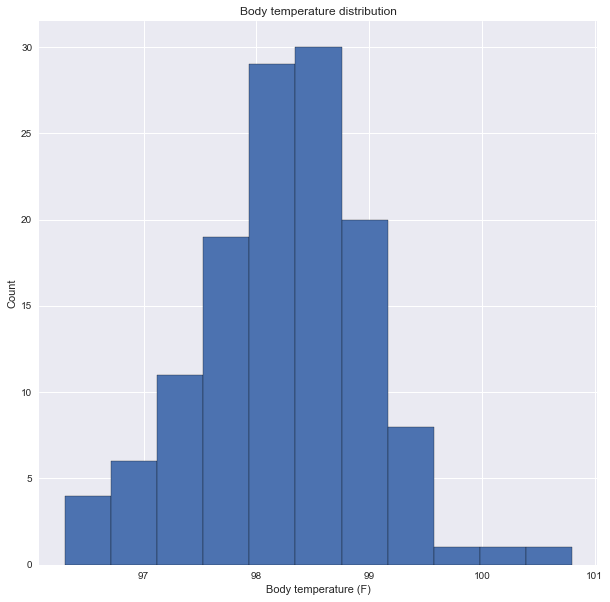

In [14]:
# Optimal number of bins (sqrt(size))
n_bins = int(np.sqrt(df.shape[0]))

# Create a figure of size 10x10
plt.figure(figsize=(10, 10))

# Plot histogram of the body temperature
plt.hist(df.temperature,bins=n_bins,edgecolor="k")

# Set plot parameters
plt.xlabel('Body temperature (F)')
plt.ylabel('Count')
plt.title('Body temperature distribution')

# Show histogram
plt.show()

**Analysis**: The plot seems to depict a bell-curve. Howver, the data is not really symetrical. In order to make a decision, we need to pursue our investigation.

In [111]:
# Prepare a theoretical normal distribution based on the properties of our distribution
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()

# Generate a normally distributed serie
temp_normal = np.random.normal(temp_mean,temp_std,100000)

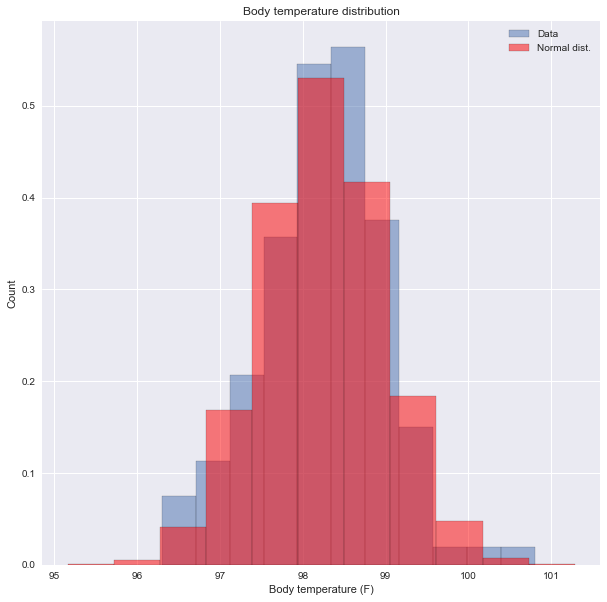

In [112]:
# Plot the normalized data set and the theoretical distribution
# Optimal number of bins (sqrt(size))
n_bins = int(np.sqrt(df.shape[0]))

# Create a figure of size 10x10
plt.figure(figsize=(10, 10))

# Plot histogram of the body temperature
plt.hist(df.temperature,bins=n_bins,edgecolor="k",normed=True,alpha = 0.5,label='Data')

# Plot histogram of the body temperature
plt.hist(temp_normal,bins=n_bins,edgecolor="k",normed=True,alpha=0.5,color='r',label='Normal dist.')

# Set plot parameters
plt.xlabel('Body temperature (F)')
plt.ylabel('Count')
plt.title('Body temperature distribution')
plt.legend()

# Show histogram
plt.show()

The two distributions are closed but they do not match perfectly. In order to validate our assumption, we will now use the qq-plot.

## 1.2. Quantile-quantile plot

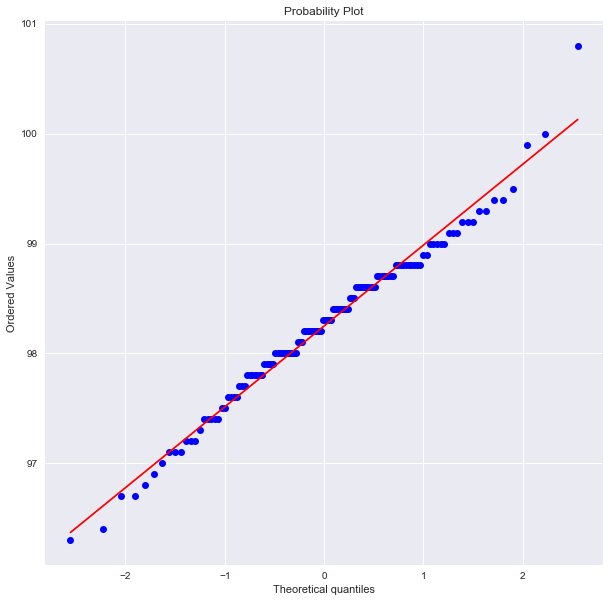

In [109]:
# Create a figure of size 10x10
plt.figure(figsize=(10, 10))

# Create QQ plot using stats library
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

As show above, the data matches the properties of the normal distribution around the mean. However, as we move away from the man, we observe a thinner tail for our data for low temperatures and a thicker tail for high temperature.

## 1.4. ECDF

In this section we will compare the empirical cumulative distribution of the sample data versus the CDF of a normal distribution.

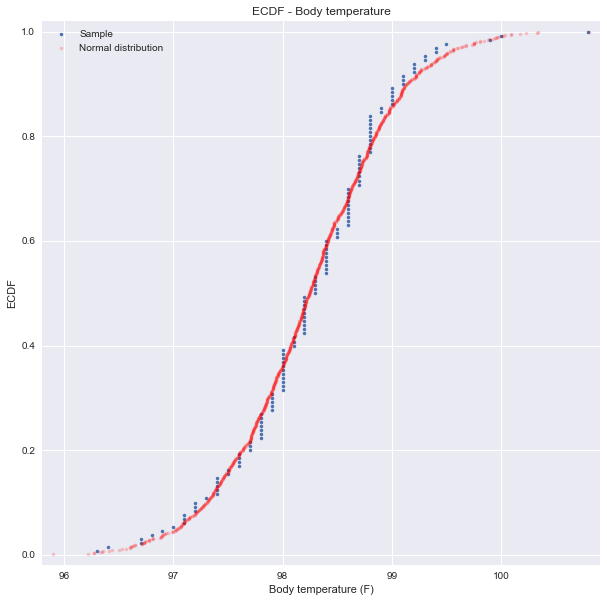

In [135]:
### Create a figure of size 10x10
plt.figure(figsize=(10, 10))

# Generate a normally distributed serie
temp_normal = np.random.normal(temp_mean,temp_std,1000)

# Compute ECDF for the sample
x_temp,y_temp = ecdf(df.temperature.values)

# Compute the ECDF for the normally distributed data
x_norm,y_norm = ecdf(temp_normal)

# Generate plot
plt.plot(x_temp,y_temp,marker='.',linestyle='none',label='Sample')
plt.plot(x_norm,y_norm,marker='.',linestyle='none',color='red',alpha=0.2,label='Normal distribution')

# Improve margins
plt.margins(0.02)

# Label the axes
plt.xlabel('Body temperature (F)')
plt.ylabel('ECDF')

plt.title('ECDF - Body temperature')

# Add legend
plt.legend()

# Display the plot
plt.show()

The conclusions made previously still hold. In order to make a final decision, we will test the hypothesis that our data is normally distributed.  

## 1.4. Hypothesis testing

**Hypothesis**:

Ho (Null hypothesis): Our data is normally distributed  
Ha (Alternative hypothesis): Our data does not follow a normal distribution

In [138]:
# We are using the scipy module to test our hypothesis.
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

**Analysis**: with a *p*-value of 0.25, we cannot reject Ho. Therefore, based on our preliminary analysis and the hypothesis testing, we conclude that our data is normally distributed.

## 1.5. Gender study (Optional)

Since the data provides the gender of the sample, we will repeat our analysis but this time, we will considered both genders separately. Our assumption is that both gender a normally distributed but with different means and standard deviations. Therefore, when we combine them, the resulting sample distribution is not as clear.

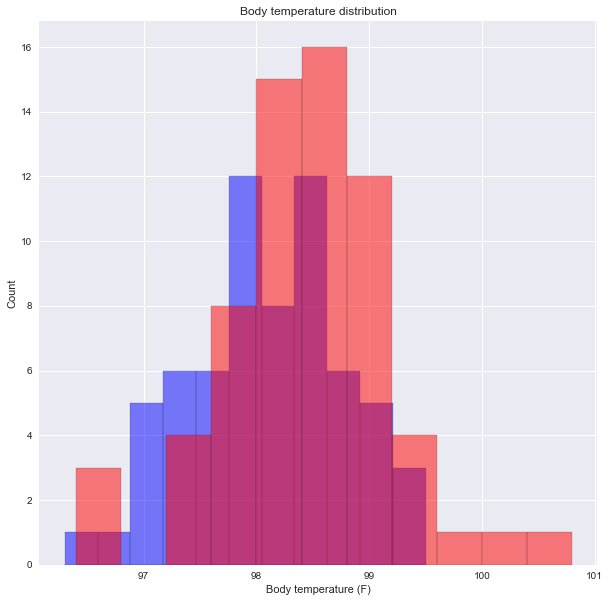

In [120]:
# Optimal number of bins (sqrt(size))
n_bins = int(np.sqrt(df.shape[0]))

# Create a figure of size 10x10
plt.figure(figsize=(10, 10))

# Plot histogram of the body temperature
plt.hist(df.temperature[df.gender=="M"],bins=n_bins,edgecolor="k",label='Males',color='blue',alpha=0.5)
plt.hist(df.temperature[df.gender=="F"],bins=n_bins,edgecolor="k",label='Femals',color='red',alpha=0.5)

# Set plot parameters
plt.xlabel('Body temperature (F)')
plt.ylabel('Count')
plt.title('Body temperature distribution')

# Show histogram
plt.show()

**Analysis**: Our assumptions seemed to be correct, when we look at the distribution individually, they seem to be closer to a bell-shape curve as the entiere set was.

**Analysis**: Again the results now seem symetrical and with smaller tails.

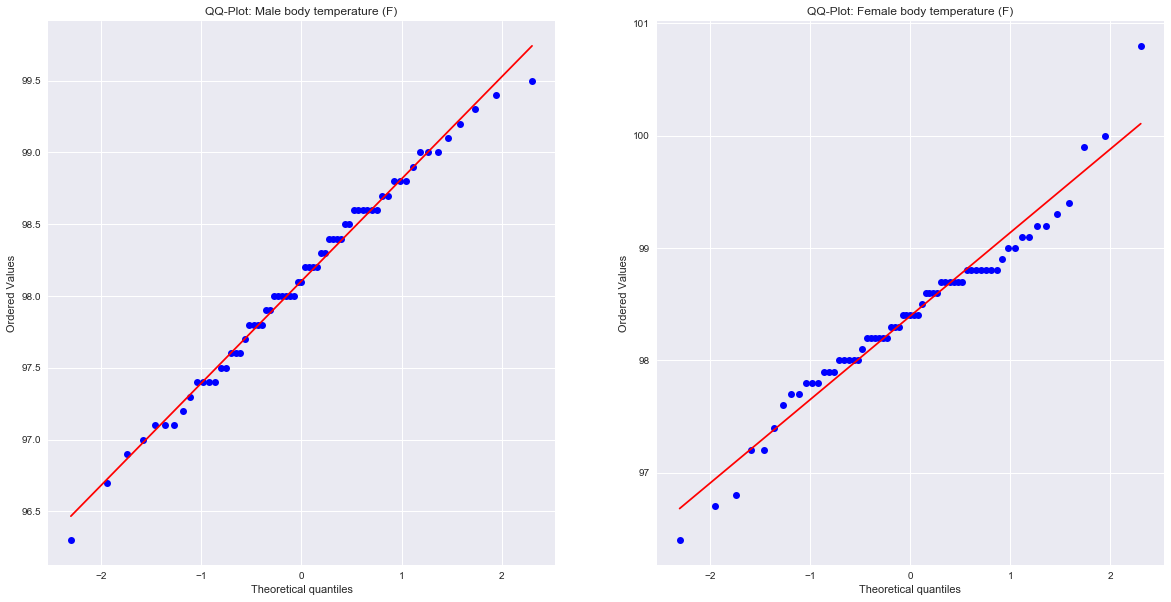

In [134]:
# Create a figure of size 10x10
plt.figure(figsize=(20, 10))

# Create QQ plot using stats library
plt.subplot(1, 2, 1)
stats.probplot(df.temperature[df.gender=='M'], dist="norm", plot=pylab)
plt.title("QQ-Plot: Male body temperature (F)")

plt.subplot(1, 2, 2)
stats.probplot(df.temperature[df.gender=='F'], dist="norm", plot=pylab)
plt.title("QQ-Plot: Female body temperature (F)")

# Show plot
pylab.show()

**Analysis**: By looking at the qq-plot, it seems that the body temperature distribution amongst men is closer to a normal distribution. Indeed, the tails of the female distribution do not match the normal distribution.

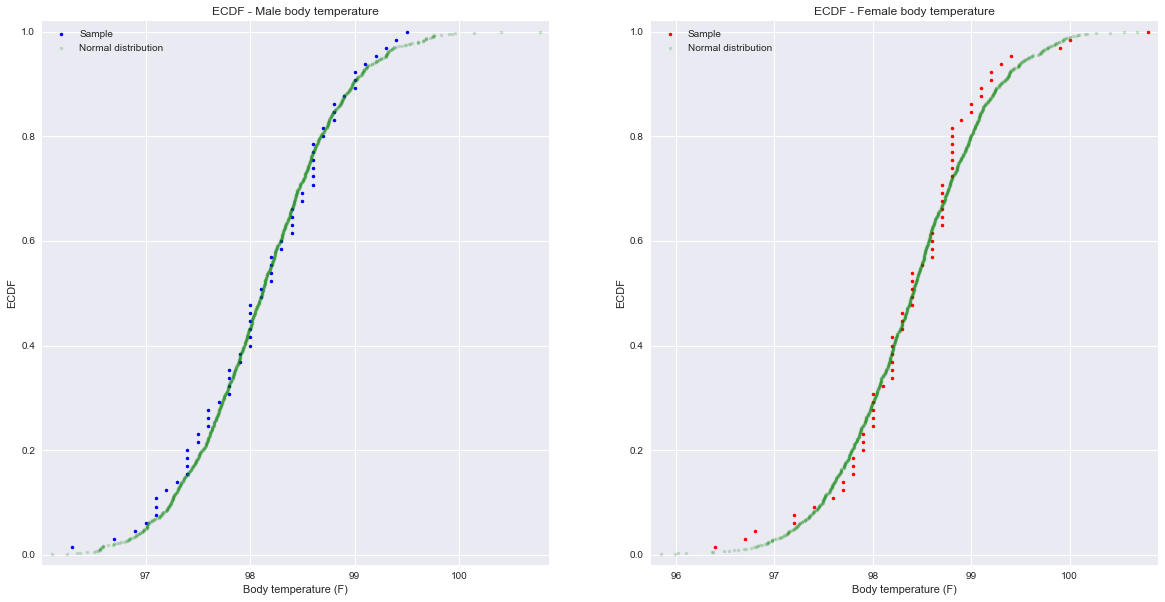

In [137]:
### Create a figure of size 10x10
plt.figure(figsize=(20, 10))

# Generate a normally distributed serie
temp_normal_male = np.random.normal(df.temperature[df.gender=="M"].mean(),df.temperature[df.gender=="M"].std(),1000)
temp_normal_female = np.random.normal(df.temperature[df.gender=="F"].mean(),df.temperature[df.gender=="F"].std(),1000)

# Compute ECDF for the sample
x_temp_male,y_temp_male = ecdf(df.temperature[df.gender=='M'].values)
x_temp_female,y_temp_female = ecdf(df.temperature[df.gender=='F'].values)

# Compute the ECDF for the normally distributed data
x_norm_male,y_norm_male = ecdf(temp_normal_male)
x_norm_female,y_norm_female = ecdf(temp_normal_female)

# Generate plot
plt.subplot(1, 2, 1)
plt.plot(x_temp_male,y_temp_male,marker='.',linestyle='none',label='Sample',color='blue')
plt.plot(x_norm_male,y_norm_male,marker='.',linestyle='none',color='green',alpha=0.2,label='Normal distribution')

# Label the axes
plt.xlabel('Body temperature (F)')
plt.ylabel('ECDF')
plt.title('ECDF - Male body temperature')

# Improve margins
plt.margins(0.02)
plt.legend()

# Generate plot
plt.subplot(1, 2, 2)
plt.plot(x_temp_female,y_temp_female,marker='.',linestyle='none',label='Sample',color='red')
plt.plot(x_norm_female,y_norm_female,marker='.',linestyle='none',color='green',alpha=0.2,label='Normal distribution')

# Label the axes
plt.xlabel('Body temperature (F)')
plt.ylabel('ECDF')
plt.title('ECDF - Female body temperature')

# Improve margins
plt.margins(0.02)
plt.legend()


# Display the plot
plt.show()

**Analysis**: Again, the male distribution seems to be closer to a normal distribution, especially as we move away from the mean.

We now produce the results for a normal distribution test. 

**Hypothesis**:

Ho (Null hypothesis): Our data is normally distributed  
Ha (Alternative hypothesis): Our data does not follow a normal distribution

In [140]:
# We are using the scipy module to test our hypothesis.
stats.normaltest(df.temperature[df.gender=='M'])

NormaltestResult(statistic=0.89119996669505031, pvalue=0.64043990745691226)

In [139]:
# We are using the scipy module to test our hypothesis.
stats.normaltest(df.temperature[df.gender=='F'])

NormaltestResult(statistic=4.7354381129083993, pvalue=0.093694193898564038)

**Analysis**: We previously had a p-value of 0.25 when considering the entiere populaiton. We now have a far better result for the men only with a p-value of 64%. Moreover, the p-value for the females is now only 9%. This is still enough to validate the null hypothesis, however, the results are not as good as before.

# Question 2

In this question, we are asked to determine if the sample size is large enough to extend our conclusion to the entiere population. We first compute the sample size:

In [29]:
print('The sample size is:',df.shape[0])

The sample size is: 130


With a sample size of 130 records, we will have enough data to minimize the standard error. Indeed. the standard error is function of $1/sqrt(N)$ where N is the sample size.

# Question 3

We will now determine if the true population body temperature mean is 98.6 F.  

Although the population size is large enough to use a Z-test, because we do not have the standard deviation of the body temperature for the entiere population, we will need to use a T-test to determine if the true mean is 98.6 F.  

Since we are trying to determine the true mean of a single population, we will use a one-sample test with two tails.

**Null hypothesis**: Ho -> The true mean of the population temperature is 98.6 F   
**Alternative hypothesis**: Ha -> The true mean is not 98.6 F

In [34]:
# Compute standard error
std_err = df.temperature.std()/np.sqrt(df.shape[0])
std_err

0.06430441683789101

In [36]:
# Compute T-statistic
t_value = (df.temperature.mean()-98.6)/std_err
t_value

-5.4548232923640789

In [37]:
# Compute degrees of freedom
deg_f = df.shape[0]-1
deg_f

129

In [40]:
# Compute the p-value associated to our test
stats.t.sf(np.abs(t_value),deg_f)*2

2.4106320415609943e-07

With a p-value of 2.4E-7, we reject the null hypothesis. The propability of to obtain a data distribution similar to our sample is too small to have occured by chance.

**However, it is important to considered other factor that might have altered the results of our test data. For instance if the test was done is a abnormally warm environment or if your sample has not been properly randomly selected, the data cannot be trusted.**

In conclusion, the true mean of our population regarding the body temperature is not 98.6 F.

We now repeat our analysis using a Z-test:

In [42]:
z_value = (df.temperature.mean()-98.6)/std_err
z_value

-5.4548232923640789

In [47]:
# Compute p-value associated to the Z-test
p_val = 2*stats.norm.cdf(z_value)
p_val

4.9021570141133797e-08

The *p*-value associated to the Z-test is small enough to reject the null hypothesis. The conclusions made from the T-test still hold.  

The difference in p-values between the z-test (lower) and the t-test (higher) is expected because the Student t-distribution has larger tails than the normal distribution.

# Question 4

Using the notion of margin of error on the standard deviation of the data set, the confidence interval is defined using the standard error defined for a t-test as:

$Interval = \bar{X}\pm q_{97.5\%}*\bar{\sigma}*\sqrt{\frac{N-1}{N}}$ where *$\bar{\sigma}$* is the standard deviation of the data, *N* is the sample size, and $q_{97.5\%}$ is the 97.5% quantile using the student's t-distribution.

In [72]:
# Number of standard devition to 97.5th quantile
crit_t = stats.t.ppf(0.975, len(df.temperature) - 1)
crit_t

1.9785244914586051

In [73]:
# 95% Confidence interval
upper_range_95 = df.temperature.mean()+crit_t*df.temperature.std()*np.sqrt((1 - 1/(len(df.temperature))))
lower_range_95 = df.temperature.mean()-crit_t*df.temperature.std()*np.sqrt((1 - 1/(len(df.temperature))))
print("Confidence interval: ",lower_range_95,upper_range_95)

Confidence interval:  96.8042000161 99.6942615223


**Analysis**: If a body temperature is lower than 98.12 F or higher than 98.38 F then it is considered abnormal.

# Question 5

We will now evaluate the differences in body temperature bewteen the males and femals. To do so, we will perform the following test:  
**Null hypothesis**: Ho -> There is no difference in mean between males and females  
**Alternative hypothesis**: Ha -> There is a difference in mean between males and females
  
Since the standard deviations of the entiere male and female populations are not provided, we will use a two-samples t-test using the standard deviations of the data set.

In [94]:
# We compute the sample statistics
print("Male mean", df.temperature[df.gender=='M'].mean())
print("Female mean", df.temperature[df.gender=='F'].mean())

print("Male std", df.temperature[df.gender=='M'].std())
print("Female std", df.temperature[df.gender=='F'].std())

Male mean 98.1046153846154
Female mean 98.39384615384613
Male std 0.6987557623265908
Female std 0.7434877527313665


In [95]:
# We perform the t-test with two samples
stats.ttest_ind(df.temperature[df.gender=='M'],df.temperature[df.gender=='F'],equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

**Analysis**: If we considered a threshold of 5%, the obtained p-value of 2.4% suggested that we can reject the null hypothesis and conclude that our sample data is statistically significant to describe the statistics of the entiere population and that there is indeed a significant difference in the true mean body temperature between males and females.

**However, it is important to considered other factor that might have altered the results of our test data. For instance if your sample has not been properly randomly selected, the data cannot be trusted.**

We now look back at the conclusion we made regarding the 98.6 F true mean. For this new analysis, we now perfom two t-test, one for the males and one for the females with the following hypotheses:  

**Ho** (Null hypothesis): Our data is normally distributed  
**Ha** (Alternative hypothesis): Our data does not follow a normal distribution

In [100]:
# Male test
stats.ttest_1samp(df.temperature[df.gender=='M'],98.6)

Ttest_1sampResult(statistic=-5.7157574493186907, pvalue=3.083840317313081e-07)

In [101]:
# Female test
stats.ttest_1samp(df.temperature[df.gender=='F'],98.6)

Ttest_1sampResult(statistic=-2.2354980796784965, pvalue=0.028880450789682037)

Again both tests produce statistically significant results and based on the p-values, we can reject the null hypothesis for both tests if we considered a 5% cut-off.